# Machine learning HW6
裴嘉政 519111910231

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics, ensemble
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import shuffle

In [2]:
filename = './spambase.csv'
df = pd.read_csv(filename)
plt.style.use('ggplot')
tree_depth = 5
min_sample = 5
num_tree = 50

## Task 1

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
TSS = [0.01, 0.05, 0.1, 0.15, 0.20, 0.25, 0.5]
tree_accu = []
bagging_accu = []
randfo_accu = []
adaboost_accu = []
for i in TSS:
    tree_accu_tmp = []
    bagging_accu_tmp = []
    randfo_accu_tmp = []
    adaboost_accu_tmp = []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(X):
        train_size = int(train_index.shape[0]*i)
        train_index = train_index[:train_size]
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # decision tree
        dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=tree_depth, min_samples_leaf=min_sample)
        dtree.fit(X_train, y_train)
        y_pred_dt = dtree.predict(X_test)
        tree_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_dt))
        # bagging decision tree
        bt = ensemble.BaggingClassifier(n_estimators=num_tree, base_estimator=tree.DecisionTreeClassifier(max_depth=tree_depth,
                                                                                                min_samples_leaf=min_sample))
        bt.fit(X_train, y_train)
        y_pred_bt = bt.predict(X_test)
        bagging_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_bt))
        # random forest
        rf = ensemble.RandomForestClassifier(n_estimators=num_tree, max_depth=tree_depth, min_samples_leaf=min_sample)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        randfo_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_rf))
        # AdaBoost
        AdaBoost = ensemble.AdaBoostClassifier(n_estimators=num_tree, base_estimator=tree.DecisionTreeClassifier(max_depth=tree_depth,
                                                                                                  min_samples_leaf=min_sample))
        AdaBoost.fit(X_train, y_train)
        y_pred_ada = AdaBoost.predict(X_test)
        adaboost_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_ada))
    tree_accu.append(tree_accu_tmp)
    bagging_accu.append(bagging_accu_tmp)
    randfo_accu.append(randfo_accu_tmp)
    adaboost_accu.append(adaboost_accu_tmp)

In [16]:
# report the accuracy on the validation set
tree_avg = []
bagging_avg = []
randfo_avg = []
adaboost_avg = []
tree_std = []
bagging_std = []
randfo_std = []
adaboost_std = []
print("The accuracy of decision tree corresponding to the specific TSS:")
for i in tree_accu:
    tree_avg.append(np.round(np.mean(i),4))
    tree_std.append(np.round(np.std(i),4))
print(tree_avg)
print("The accuracy of bagging decision trees corresponding to the specific TSS:")
for i in bagging_accu:
    bagging_avg.append(np.round(np.mean(i),4))
    bagging_std.append(np.round(np.std(i),4))
print(bagging_avg)
print("The accuracy of random forest corresponding to the specific TSS:")
for i in randfo_accu:
    randfo_avg.append(np.round(np.mean(i),4))
    randfo_std.append(np.round(np.std(i),4))
print(randfo_avg)
print("The accuracy of AdaBoost decision trees corresponding to the specific TSS:")
for i in adaboost_accu:
    adaboost_avg.append(np.round(np.mean(i),4))
    adaboost_std.append(np.round(np.std(i),4))
print(adaboost_avg)

The accuracy of decision tree corresponding to the specific TSS:
[0.7579, 0.8481, 0.8694, 0.8902, 0.8942, 0.8889, 0.9007]
The accuracy of bagging decision trees corresponding to the specific TSS:
[0.8516, 0.8592, 0.8983, 0.905, 0.9115, 0.9157, 0.9198]
The accuracy of random forest corresponding to the specific TSS:
[0.8522, 0.8833, 0.9087, 0.9152, 0.9189, 0.9252, 0.9228]
The accuracy of AdaBoost decision trees corresponding to the specific TSS:
[0.8716, 0.8978, 0.9115, 0.9224, 0.9228, 0.9276, 0.9365]


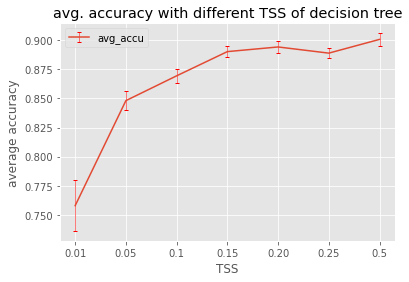

In [23]:
# decision tree
lb = ['0.01', '0.05', '0.1', '0.15', '0.20', '0.25', '0.5']
plt.errorbar(range(7), tree_avg, yerr = tree_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("TSS")
plt.xticks(range(7), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different TSS of decision tree')
plt.legend()
plt.show()

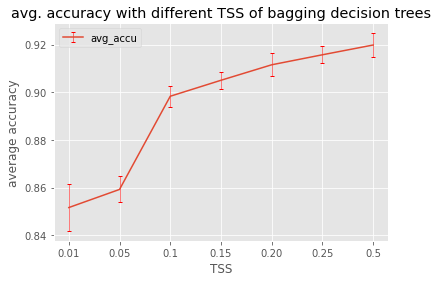

In [24]:
# bagging decision trees
lb = ['0.01', '0.05', '0.1', '0.15', '0.20', '0.25', '0.5']
plt.errorbar(range(7), bagging_avg, yerr = bagging_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("TSS")
plt.xticks(range(7), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different TSS of bagging decision trees')
plt.legend()
plt.show()

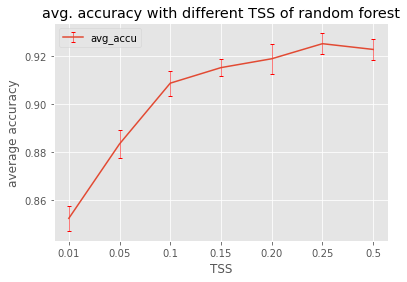

In [25]:
# random forest
lb = ['0.01', '0.05', '0.1', '0.15', '0.20', '0.25', '0.5']
plt.errorbar(range(7), randfo_avg, yerr = randfo_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("TSS")
plt.xticks(range(7), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different TSS of random forest')
plt.legend()
plt.show()

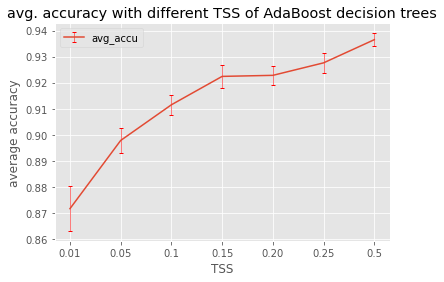

In [26]:
# AdaBoost decision trees
lb = ['0.01', '0.05', '0.1', '0.15', '0.20', '0.25', '0.5']
plt.errorbar(range(7), adaboost_avg, yerr = adaboost_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("TSS")
plt.xticks(range(7), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different TSS of AdaBoost decision trees')
plt.legend()
plt.show()

**Discussion**

Typically, the average accuracy rises with the increase of TSS, and the standard error is just the opposite. However, there may exist some exceptions beacuse of random sampling. As for specific models, the AdaBoost decision trees outperform other classifiers in average accuracy, but the simple decision tree boasts even lower standard deviation than AdaBoost. This is partly because the simple decision tree is less complicated then AdaBoost, which contributes to a lower variance and a higher bias.

However, it doesn't imply that AdaBoost is always the best model. The features of dataset should be taken into account while deciding which model to use.

In [32]:
# t-test
diff = np.array(randfo_accu)-np.array(bagging_accu)
diff_mean = diff.mean(axis=1)
diff_std = diff.std(axis=1)
t = diff_mean/(diff_std/np.sqrt(10))
t

array([0.06145715, 4.08370215, 2.04705825, 3.25931627, 2.31181302,
       3.29352579, 0.93418912])

**Paired t-test**

$H_0$:acc_RandomForest=acc_bagging

t follows a t-distribution with 9 degrees of freedom

$t_{0.05/2}(9)=2.2622$, so when the t-statistic is greater than 2.2622, the null hypothesis should be rejected and the one with higher mean accuracy is better.

Therefore, when TSS is 0.05, 0.15, 0.2, 0.25, Random Forest is better. Otherwise, the two classifiers have no significant difference. Of course, since the training and test dataset is random sampled, the final conclusion may vary when running the code for several times.

## Task 2

In [4]:
W = [10, 20, 30, 40, 50, 57]
tree_accu = []
bagging_accu = []
randfo_accu = []
adaboost_accu = []
for i in W:
    X = df.iloc[:, :i].values
    y = df.iloc[:, -1].values
    tree_accu_tmp = []
    bagging_accu_tmp = []
    randfo_accu_tmp = []
    adaboost_accu_tmp = []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # decision tree
        dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=tree_depth, min_samples_leaf=min_sample)
        dtree.fit(X_train, y_train)
        y_pred_dt = dtree.predict(X_test)
        tree_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_dt))
        # bagging decision tree
        bt = ensemble.BaggingClassifier(n_estimators=num_tree, base_estimator=tree.DecisionTreeClassifier(max_depth=tree_depth,
                                                                                                min_samples_leaf=min_sample))
        bt.fit(X_train, y_train)
        y_pred_bt = bt.predict(X_test)
        bagging_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_bt))
        # random forest
        rf = ensemble.RandomForestClassifier(n_estimators=num_tree, max_depth=tree_depth, min_samples_leaf=min_sample)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        randfo_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_rf))
        # AdaBoost
        AdaBoost = ensemble.AdaBoostClassifier(n_estimators=num_tree, base_estimator=tree.DecisionTreeClassifier(max_depth=tree_depth,
                                                                                                  min_samples_leaf=min_sample))
        AdaBoost.fit(X_train, y_train)
        y_pred_ada = AdaBoost.predict(X_test)
        adaboost_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_ada))
    tree_accu.append(tree_accu_tmp)
    bagging_accu.append(bagging_accu_tmp)
    randfo_accu.append(randfo_accu_tmp)
    adaboost_accu.append(adaboost_accu_tmp)

In [5]:
# report the accuracy on the validation set
tree_avg = []
bagging_avg = []
randfo_avg = []
adaboost_avg = []
tree_std = []
bagging_std = []
randfo_std = []
adaboost_std = []
print("The accuracy of decision tree corresponding to the first W features:")
for i in tree_accu:
    tree_avg.append(np.round(np.mean(i),4))
    tree_std.append(np.round(np.std(i),4))
print(tree_avg)
print("The accuracy of bagging decision trees corresponding to the first W features:")
for i in bagging_accu:
    bagging_avg.append(np.round(np.mean(i),4))
    bagging_std.append(np.round(np.std(i),4))
print(bagging_avg)
print("The accuracy of random forest corresponding to the first W features:")
for i in randfo_accu:
    randfo_avg.append(np.round(np.mean(i),4))
    randfo_std.append(np.round(np.std(i),4))
print(randfo_avg)
print("The accuracy of AdaBoost decision trees corresponding to the first W features:")
for i in adaboost_accu:
    adaboost_avg.append(np.round(np.mean(i),4))
    adaboost_std.append(np.round(np.std(i),4))
print(adaboost_avg)

The accuracy of decision tree corresponding to the first W features:
[0.8205, 0.8561, 0.8813, 0.8818, 0.8955, 0.9042]
The accuracy of bagging decision trees corresponding to the first W features:
[0.8335, 0.862, 0.8898, 0.8902, 0.8976, 0.9198]
The accuracy of random forest corresponding to the first W features:
[0.8344, 0.8665, 0.8933, 0.8959, 0.9015, 0.9261]
The accuracy of AdaBoost decision trees corresponding to the first W features:
[0.83, 0.8733, 0.9089, 0.9098, 0.9281, 0.9478]


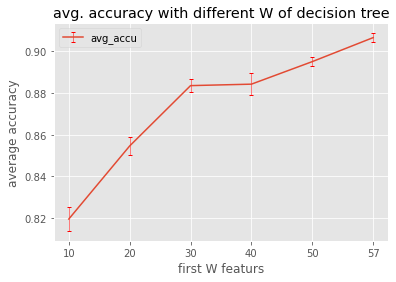

In [6]:
# decision tree
lb = ["10", "20", "30", "40", "50", "57"]
plt.errorbar(range(6), tree_avg, yerr = tree_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("first W featurs")
plt.xticks(range(6), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different W of decision tree')
plt.legend()
plt.show()

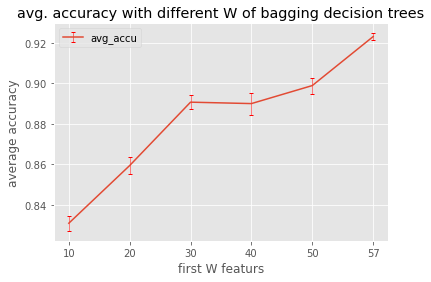

In [7]:
# bagging decision trees
lb = ["10", "20", "30", "40", "50", "57"]
plt.errorbar(range(6), bagging_avg, yerr = bagging_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("first W featurs")
plt.xticks(range(6), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different W of bagging decision trees')
plt.legend()
plt.show()

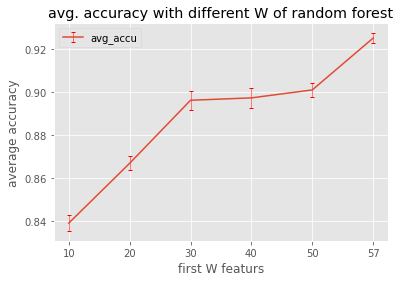

In [8]:
# random forest
lb = ["10", "20", "30", "40", "50", "57"]
plt.errorbar(range(6), randfo_avg, yerr = randfo_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("first W featurs")
plt.xticks(range(6), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different W of random forest')
plt.legend()
plt.show()

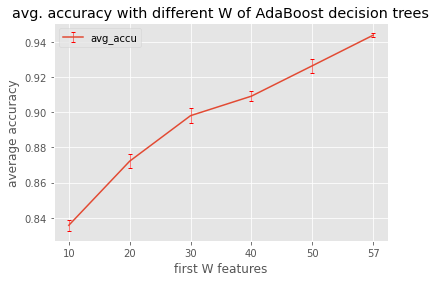

In [9]:
# AdaBoost decision trees
lb = ["10", "20", "30", "40", "50", "57"]
plt.errorbar(range(6), adaboost_avg, yerr = adaboost_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("first W features")
plt.xticks(range(6), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different W of AdaBoost decision trees')
plt.legend()
plt.show()

**Discussion**

The patterns of the accuracy are very much the same as those in Task 1. When W is larger, more useful information is provided for the classifier to learning, thus yielding a higher accuracy. For the first three classifiers, the accuracy increased a little (or even keep fixed) when W is changed from 30 to 50. This is partly beacuse that those features are so complicated that simple classifiers can't make full use of them. By contrast, AdaBoost performs pretty well on those features. As for the standard error, the whole dataset with 57 features enjoys the smallest standard error, and among the for classifiers, Adaboost's standard error is smaller than others. However, there is no clear pattern whether the standard error will decrease with the increase of W, which may due to the weird distribution of data and the algorithm itself.

In [6]:
# t-test
diff = np.array(randfo_accu)-np.array(bagging_accu)
diff_mean = diff.mean(axis=1)
diff_std = diff.std(axis=1)
t = diff_mean/(diff_std/np.sqrt(10))
t

array([0.2526443 , 2.13342081, 1.2640825 , 2.34981722, 1.39005837,
       1.80915796])

**Paired t-test**

$H_0$:acc_RandomForest=acc_bagging

t follows a t-distribution with 9 degrees of freedom

$t_{0.05/2}(9)=2.2622$, so when the t-statistic is greater than 2.2622, the null hypothesis should be rejected and the one with higher mean accuracy is better.

Therefore, when W is 40, Random Forest is better. Otherwise, the two classifiers have no significant difference. From the plots we can observe that when W is 40, the increasing rate of accuracy is very small, and the standard error is the largest, which implies the performance of the two classifiers may vary a lot.

## Task 3

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
D = [1, 5, 10, 15, 20]
tree_accu = []
bagging_accu = []
randfo_accu = []
adaboost_accu = []
for i in D:
    tree_accu_tmp = []
    bagging_accu_tmp = []
    randfo_accu_tmp = []
    adaboost_accu_tmp = []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # decision tree
        dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i, min_samples_leaf=min_sample)
        dtree.fit(X_train, y_train)
        y_pred_dt = dtree.predict(X_test)
        tree_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_dt))
        # bagging decision tree
        bt = ensemble.BaggingClassifier(n_estimators=num_tree, base_estimator=tree.DecisionTreeClassifier(max_depth=i,
                                                                                                min_samples_leaf=min_sample))
        bt.fit(X_train, y_train)
        y_pred_bt = bt.predict(X_test)
        bagging_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_bt))
        # random forest
        rf = ensemble.RandomForestClassifier(n_estimators=num_tree, max_depth=i, min_samples_leaf=min_sample)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        randfo_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_rf))
        # AdaBoost
        AdaBoost = ensemble.AdaBoostClassifier(n_estimators=num_tree, base_estimator=tree.DecisionTreeClassifier(max_depth=i,
                                                                                                  min_samples_leaf=min_sample))
        AdaBoost.fit(X_train, y_train)
        y_pred_ada = AdaBoost.predict(X_test)
        adaboost_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_ada))
    tree_accu.append(tree_accu_tmp)
    bagging_accu.append(bagging_accu_tmp)
    randfo_accu.append(randfo_accu_tmp)
    adaboost_accu.append(adaboost_accu_tmp)

In [4]:
# report the accuracy on the validation set
tree_avg = []
bagging_avg = []
randfo_avg = []
adaboost_avg = []
tree_std = []
bagging_std = []
randfo_std = []
adaboost_std = []
print("The accuracy of decision tree corresponding to the increasing maximum depth:")
for i in tree_accu:
    tree_avg.append(np.round(np.mean(i),4))
    tree_std.append(np.round(np.std(i),4))
print(tree_avg)
print("The accuracy of bagging decision trees corresponding to the increasing maximum depth:")
for i in bagging_accu:
    bagging_avg.append(np.round(np.mean(i),4))
    bagging_std.append(np.round(np.std(i),4))
print(bagging_avg)
print("The accuracy of random forest corresponding to the increasing maximum depth:")
for i in randfo_accu:
    randfo_avg.append(np.round(np.mean(i),4))
    randfo_std.append(np.round(np.std(i),4))
print(randfo_avg)
print("The accuracy of AdaBoost decision trees corresponding to the increasing maximum depth:")
for i in adaboost_accu:
    adaboost_avg.append(np.round(np.mean(i),4))
    adaboost_std.append(np.round(np.std(i),4))
print(adaboost_avg)

The accuracy of decision tree corresponding to the increasing maximum depth:
[0.7842, 0.9081, 0.917, 0.9187, 0.9163]
The accuracy of bagging decision trees corresponding to the increasing maximum depth:
[0.79, 0.9202, 0.9372, 0.9383, 0.9394]
The accuracy of random forest corresponding to the increasing maximum depth:
[0.8335, 0.9237, 0.9374, 0.9411, 0.9426]
The accuracy of AdaBoost decision trees corresponding to the increasing maximum depth:
[0.9391, 0.9472, 0.9437, 0.9489, 0.9507]


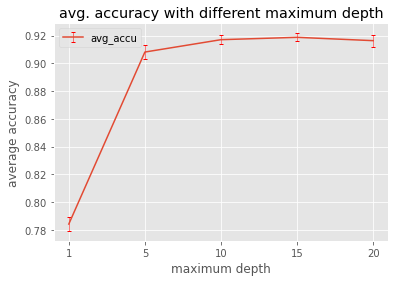

In [5]:
# decision tree
lb = ["1", "5", "10", "15", "20"]
plt.errorbar(range(5), tree_avg, yerr = tree_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("maximum depth")
plt.xticks(range(5), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different maximum depth')
plt.legend()
plt.show()

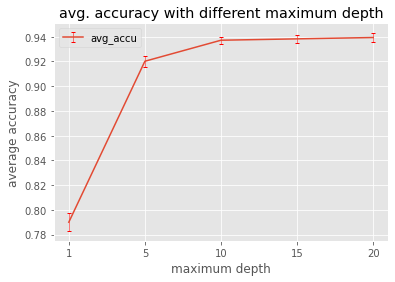

In [7]:
# bagging decision trees
lb = ["1", "5", "10", "15", "20"]
plt.errorbar(range(5), bagging_avg, yerr = bagging_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("maximum depth")
plt.xticks(range(5), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different maximum depth')
plt.legend()
plt.show()

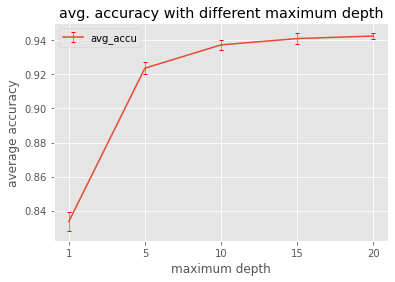

In [8]:
# random forest
lb = ["1", "5", "10", "15", "20"]
plt.errorbar(range(5), randfo_avg, yerr = randfo_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("maximum depth")
plt.xticks(range(5), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different maximum depth')
plt.legend()
plt.show()

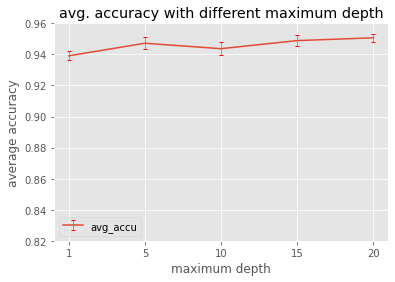

In [11]:
# AdaBoost decision trees
lb = ["1", "5", "10", "15", "20"]
plt.errorbar(range(5), adaboost_avg, yerr = adaboost_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("maximum depth")
plt.xticks(range(5), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different maximum depth')
plt.ylim((0.82, 0.96))
plt.legend()
plt.show()

**Discussion**

For the first three classifiers, there exists a clear pattern that the average accuracy increases dramatically when maximum depth is changed from 1 to 5, and the standard deviation becomes somehow smaller. However, when the maximum depth continues to increase, the average accuracy hardly changes, and in some cases it even decreases. This is because a large maximum depth leads to overfitting, which may reduce the accuracy. For AdaBoost, the accuracy remains almost fixed, which is partly because the model itself is powerful enough and the decesion tree with one depth can already predict expected results.

In [12]:
# t-test
diff = np.array(randfo_accu)-np.array(bagging_accu)
diff_mean = diff.mean(axis=1)
diff_std = diff.std(axis=1)
t = diff_mean/(diff_std/np.sqrt(10))
t

array([7.85674201, 1.23243469, 0.08686814, 1.76744016, 1.61314432])

**Paired t-test**

$H_0$:acc_RandomForest=acc_bagging

t follows a t-distribution with 9 degrees of freedom

$t_{0.05/2}(9)=2.2622$, so when the t-statistic is greater than 2.2622, the null hypothesis should be rejected and the one with higher mean accuracy is better.

We can conclude that when the maximum depth is 1, the two classifiers are significantly different, otherwise their accuracies are almost the same.

## Task 4

In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
N = [1, 2, 5, 10, 15 ,20, 25, 50]
tree_accu = []
bagging_accu = []
randfo_accu = []
adaboost_accu = []
for i in N:
    tree_accu_tmp = []
    bagging_accu_tmp = []
    randfo_accu_tmp = []
    adaboost_accu_tmp = []
    kf = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # decision tree
        dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=tree_depth, min_samples_leaf=min_sample)
        dtree.fit(X_train, y_train)
        y_pred_dt = dtree.predict(X_test)
        tree_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_dt))
        # bagging decision tree
        bt = ensemble.BaggingClassifier(n_estimators=i, base_estimator=tree.DecisionTreeClassifier(max_depth=tree_depth,
                                                                                                min_samples_leaf=min_sample))
        bt.fit(X_train, y_train)
        y_pred_bt = bt.predict(X_test)
        bagging_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_bt))
        # random forest
        rf = ensemble.RandomForestClassifier(n_estimators=i, max_depth=tree_depth, min_samples_leaf=min_sample)
        rf.fit(X_train, y_train)
        y_pred_rf = rf.predict(X_test)
        randfo_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_rf))
        # AdaBoost
        AdaBoost = ensemble.AdaBoostClassifier(n_estimators=i, base_estimator=tree.DecisionTreeClassifier(max_depth=tree_depth,
                                                                                                  min_samples_leaf=min_sample))
        AdaBoost.fit(X_train, y_train)
        y_pred_ada = AdaBoost.predict(X_test)
        adaboost_accu_tmp.append(metrics.accuracy_score(y_test, y_pred_ada))
    tree_accu.append(tree_accu_tmp)
    bagging_accu.append(bagging_accu_tmp)
    randfo_accu.append(randfo_accu_tmp)
    adaboost_accu.append(adaboost_accu_tmp)

In [20]:
# report the accuracy on the validation set
tree_avg = []
bagging_avg = []
randfo_avg = []
adaboost_avg = []
tree_std = []
bagging_std = []
randfo_std = []
adaboost_std = []
print("The accuracy of decision tree(control group):")
for i in tree_accu:
    tree_avg.append(np.round(np.mean(i),4))
    tree_std.append(np.round(np.std(i),4))
print(tree_avg)
print("The accuracy of bagging decision trees corresponding to the increasing base learners:")
for i in bagging_accu:
    bagging_avg.append(np.round(np.mean(i),4))
    bagging_std.append(np.round(np.std(i),4))
print(bagging_avg)
print("The accuracy of random forest corresponding to the increasing base learners:")
for i in randfo_accu:
    randfo_avg.append(np.round(np.mean(i),4))
    randfo_std.append(np.round(np.std(i),4))
print(randfo_avg)
print("The accuracy of AdaBoost decision trees corresponding to the increasing base learners:")
for i in adaboost_accu:
    adaboost_avg.append(np.round(np.mean(i),4))
    adaboost_std.append(np.round(np.std(i),4))
print(adaboost_avg)

The accuracy of decision tree(control group):
[0.9107, 0.9052, 0.9048, 0.9065, 0.9076, 0.9013, 0.9035, 0.9029]
The accuracy of bagging decision trees corresponding to the increasing base learners:
[0.8996, 0.912, 0.9185, 0.9209, 0.9204, 0.9189, 0.9246, 0.922]
The accuracy of random forest corresponding to the increasing base learners:
[0.8489, 0.887, 0.9128, 0.9135, 0.9213, 0.9228, 0.922, 0.922]
The accuracy of AdaBoost decision trees corresponding to the increasing base learners:
[0.9107, 0.9215, 0.93, 0.9363, 0.9357, 0.937, 0.9357, 0.9465]


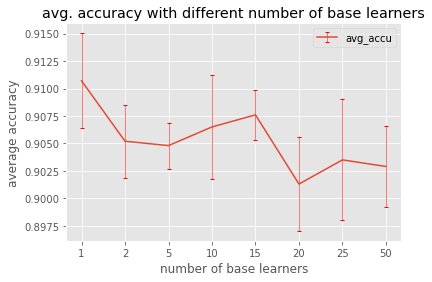

In [21]:
# decision tree
lb = ["1", "2", "5", "10", "15", "20", "25", "50"]
plt.errorbar(range(8), tree_avg, yerr = tree_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("number of base learners")
plt.xticks(range(8), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different number of base learners')
plt.legend()
plt.show()

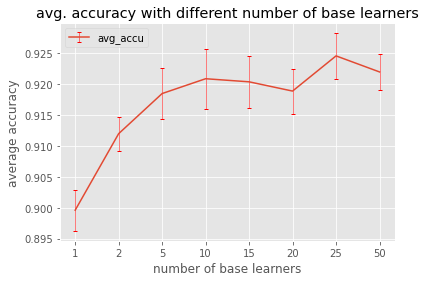

In [22]:
# bagging decision trees
lb = ["1", "2", "5", "10", "15", "20", "25", "50"]
plt.errorbar(range(8), bagging_avg, yerr = bagging_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("number of base learners")
plt.xticks(range(8), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different number of base learners')
plt.legend()
plt.show()

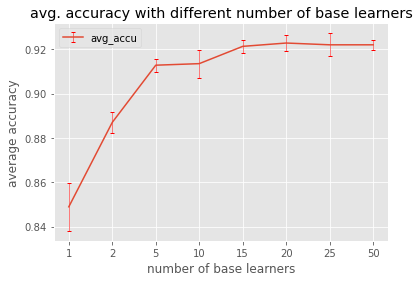

In [23]:
# random forest
lb = ["1", "2", "5", "10", "15", "20", "25", "50"]
plt.errorbar(range(8), randfo_avg, yerr = randfo_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("number of base learners")
plt.xticks(range(8), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different number of base learners')
plt.legend()
plt.show()

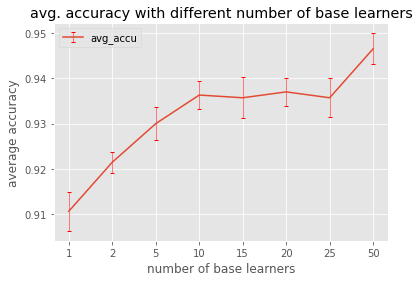

In [24]:
# AdaBoost decision trees
lb = ["1", "2", "5", "10", "15", "20", "25", "50"]
plt.errorbar(range(8), adaboost_avg, yerr = adaboost_std/np.sqrt(10), fmt = "-", ecolor = "red", elinewidth = 0.5, capsize = 2, capthick = 1, label="avg_accu")
plt.xlabel("number of base learners")
plt.xticks(range(8), lb)
plt.ylabel('average accuracy')
plt.title('avg. accuracy with different number of base learners')
plt.legend()
plt.show()

**Disscussion**

The simple decision tree is set as the control group. For the other 3 classifiers, the average accuracy improves a little bit with the increasing of number of base learners, but the increasing rates become smaller when the number is bigger than 10. This also suggests that the number of base learners is not kind of the bigger, the better. It really depends on the real dataset.

In [25]:
# t-test
diff = np.array(randfo_accu)-np.array(bagging_accu)
diff_mean = diff.mean(axis=1)
diff_std = diff.std(axis=1)
t = diff_mean/(diff_std/np.sqrt(10))
t

array([-5.42722205e+00, -4.90101203e+00, -1.72867641e+00, -1.47298902e+00,
        2.33387298e-01,  1.42436148e+00, -7.50029015e-01, -5.11346296e-04])

**Paired t-test**

$H_0$:acc_RandomForest=acc_bagging

t follows a t-distribution with 9 degrees of freedom

$t_{0.05/2}(9)=2.2622$, so when the absolute value of t-statistic is greater than 2.2622, the null hypothesis should be rejected and the one with higher mean accuracy is better.

Therefore, when the number of base learners is 1 or 2, the two classifiers are significantly different, otherwise they have no clear difference.